# 5340 Fall 2023
# Part IV: Basics of finite elements


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# In this notebook, we add a new library, Triangle
# The documentation and information on how to download
# can be found https://rufat.be/triangle/

import triangle as tr 

# Triangle is good at generating triangular meshes for planar domains 

In [52]:
# The following function generates a series of points and segments
# representing a (simply connected) polygonal domain that can be 
# passed as data to the Triangle library
# See https://rufat.be/triangle/examples.html for further examples

def SimplyConnected(func,N): 
    # The arguments have the following meaning:
    # func is a parametrization of the original boundary curve
    # N is the number of vertices in the resulting polygonal curve
    # The output is a list of points and a list of segments 
    pts = np.empty((N,2))
    for i in range(N):
        pts[i] = func(i/N)
    i = np.arange(N)
    seg = np.stack([i,i+1],axis = 1) % N
    return pts, seg

def CircleFunc(theta,R=1): 
    # Provides the polar parametrization of a circle of radius R
    return np.array([R*np.cos(2*np.pi*theta),R*np.sin(2*np.pi*theta)])    

def TrigFunc(theta): 
    # Provides the polar parametrization of a curve given by
    # a trigonometric polynomial
    a = np.array([1.0,2.0,6.0,12.0,20.0])*np.pi*2 # vector of frequencies
    c = np.array([3.8,0.1,0.2,0.005,0.0]) # vector of amplitudes
    f = np.array([0.0,0.0])
    for i in range(len(a)):
        f = f+np.array([c[i]*np.cos(a[i]*theta),c[i]*np.sin(a[i]*theta)])
    return f 

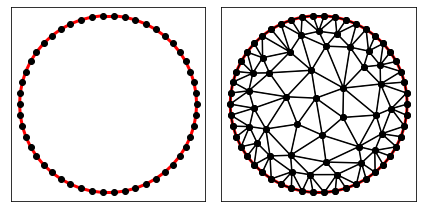

In [58]:
pts, seg = SimplyConnected(CircleFunc,50)

A = dict(vertices=pts, segments=seg)
B = tr.triangulate(A, 'qpa0.1e')

tr.compare(plt, A, B)
plt.show()

In [59]:
print(type(B))
print(B.keys())

<class 'dict'>
dict_keys(['vertices', 'vertex_markers', 'triangles', 'segments', 'segment_markers', 'edges', 'edge_markers'])


In [60]:
tau = B['triangles']
print(type(tau))
print(len(tau))

<class 'numpy.ndarray'>
122


In [61]:
tau

array([[55, 54, 29],
       [79, 78, 71],
       [58, 71, 72],
       [54, 55, 50],
       [29, 54, 28],
       [59, 85, 74],
       [60, 59, 73],
       [28, 54, 27],
       [33, 67, 66],
       [ 8, 73,  7],
       [77, 76, 38],
       [69, 63, 81],
       [16, 69, 15],
       [67, 56, 66],
       [67, 34, 35],
       [71, 58, 83],
       [74,  1,  2],
       [33, 34, 67],
       [31, 66, 55],
       [ 0,  1, 70],
       [77, 79, 68],
       [53, 65, 25],
       [21, 22, 62],
       [26, 53, 25],
       [66, 50, 55],
       [55, 29, 30],
       [64, 62, 52],
       [24, 25, 65],
       [82, 50, 56],
       [57, 61, 11],
       [26, 27, 54],
       [50, 84, 53],
       [64, 19, 20],
       [20, 21, 62],
       [62, 65, 52],
       [50, 82, 84],
       [26, 54, 53],
       [18, 63, 17],
       [66, 31, 32],
       [19, 64, 18],
       [69, 57, 14],
       [30, 31, 55],
       [62, 64, 20],
       [50, 53, 54],
       [69, 16, 63],
       [17, 63, 16],
       [76, 67, 36],
       [ 1, 7

In [62]:
vert = B['vertices']
print(vert)

[[ 1.00000000e+00  0.00000000e+00]
 [ 9.92114701e-01  1.25333234e-01]
 [ 9.68583161e-01  2.48689887e-01]
 [ 9.29776486e-01  3.68124553e-01]
 [ 8.76306680e-01  4.81753674e-01]
 [ 8.09016994e-01  5.87785252e-01]
 [ 7.28968627e-01  6.84547106e-01]
 [ 6.37423990e-01  7.70513243e-01]
 [ 5.35826795e-01  8.44327926e-01]
 [ 4.25779292e-01  9.04827052e-01]
 [ 3.09016994e-01  9.51056516e-01]
 [ 1.87381315e-01  9.82287251e-01]
 [ 6.27905195e-02  9.98026728e-01]
 [-6.27905195e-02  9.98026728e-01]
 [-1.87381315e-01  9.82287251e-01]
 [-3.09016994e-01  9.51056516e-01]
 [-4.25779292e-01  9.04827052e-01]
 [-5.35826795e-01  8.44327926e-01]
 [-6.37423990e-01  7.70513243e-01]
 [-7.28968627e-01  6.84547106e-01]
 [-8.09016994e-01  5.87785252e-01]
 [-8.76306680e-01  4.81753674e-01]
 [-9.29776486e-01  3.68124553e-01]
 [-9.68583161e-01  2.48689887e-01]
 [-9.92114701e-01  1.25333234e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-9.92114701e-01 -1.25333234e-01]
 [-9.68583161e-01 -2.48689887e-01]
 [-9.29776486e-01 -3